# 3361 sandbox

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import prolif as plf
import src.analysis_functions
import glob
import src.simulation_metadata as sims
from MDAnalysis.analysis.rms import RMSD


#### load simulations. Don't have a function in analysis functions for this right now, not exactly sure how I will call it

In [13]:
all_unis, all_lens = analysis_functions.load_unis(
    sim_list=[sims.PfHT_3361_crystal, sims.PfHT_3361_em],
    protonly_or_wholesys="protonly",
)

In [29]:
all_fp_dfs = {}
skip = 1

for name, rep_list in all_unis.items():
    temp = []
    for n, rep_uni in enumerate(rep_list):
        df = analysis_functions.get_fp_dataframe(
            u=rep_uni,
            skip=skip,
            run_calc=False,
            ligname="resname F00",
            filename=f"{name}.replica_{n+1}.skip{skip}",
        )
        temp.append(df)
    all_fp_dfs[name] = temp

In [30]:
all_RMSD_dfs = {}
skip = 1

paths = {
    sims.PfHT_3361_crystal[0]: sims.PfHT_3361_crystal[1],
    sims.PfHT_3361_em[0]: sims.PfHT_3361_em[1],
}  # TODO This is temp, need to fix to not be hard coded

for name, rep_list in all_unis.items():
    temp = []
    for n, rep_uni in enumerate(rep_list):
        rmsd = analysis_functions.calc_rmsd(
            u=rep_uni,
            skip=skip,
            ref_name=f"{paths[name]}/replica_{n+1}/production/{name}.{n+1}.start.protonly.gro",
            groupselections=["resname F00"],
            run_calc=True,
        )
        temp.append(rmsd)
    all_RMSD_dfs[name] = temp

/home/semccomas/anaconda3/envs/prolif/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


(0.0, 8.955926905121707)

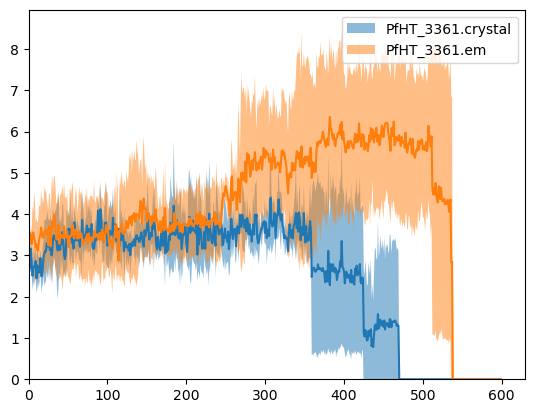

In [57]:
f, ax = plt.subplots(1, 1)
for name, rep_list in all_RMSD_dfs.items():
    temp = np.zeros((3, 600))
    for n, rep in enumerate(rep_list):
        temp[n, 0 : np.shape(rep)[0]] = rep[:, 3]
    ax.plot(np.mean(temp, axis=0))
    ax.fill_between(
        np.arange(0, np.shape(temp)[1]),
        np.mean(temp, axis=0) - np.std(temp, axis=0),
        np.mean(temp, axis=0) + np.std(temp, axis=0),
        alpha=0.5,
        label=name,
    )

ax.legend()
ax.set_xlim(0)
ax.set_ylim(0)

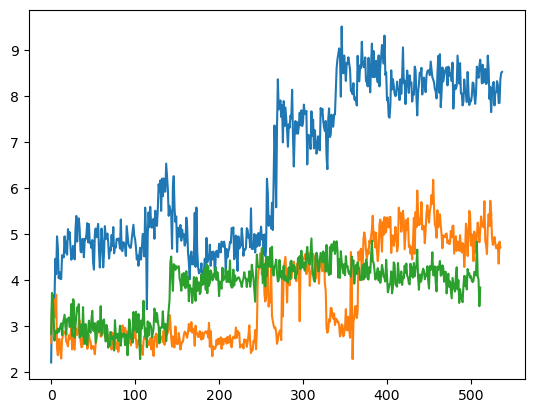

In [63]:
for n in range(0, 3):
    plt.plot(all_RMSD_dfs["PfHT_3361.em"][n][:, 3])